# Bài tập 3 - Thống kê mô tả

*(Thống kê máy tính và ứng dụng - ĐTTX Kì 1 2024-2025)*

MSSV: 21850024

Họ và tên: Nguyễn Minh Tư

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Bộ dữ liệu `Titanic`

Dữ liệu `Titanic Dataset`: https://vincentarelbundock.github.io/Rdatasets/datasets.html, https://vincentarelbundock.github.io/Rdatasets/csv/carData/TitanicSurvival.csv

Tham khảo: https://vincentarelbundock.github.io/Rdatasets/doc/carData/TitanicSurvival.html.

In [10]:
titanic = pd.read_csv("TitanicSurvival.csv")
titanic

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st
...,...,...,...,...,...
1304,"Zabour, Miss. Hileni",no,female,14.5000,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5000,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0000,3rd


Bỏ cột đầu tiên (cột tên)

In [11]:
try:
    titanic.drop("Unnamed: 0", axis=1, inplace=True)
except:
    pass

titanic

,survived,sex,age,passengerClass
0,yes,female,29.0000,1st
1,yes,male,0.9167,1st
2,no,female,2.0000,1st
3,no,male,30.0000,1st
4,no,female,25.0000,1st
...,...,...,...,...
1304,no,female,14.5000,3rd
1305,no,female,NaN,3rd
1306,no,male,26.5000,3rd
1307,no,male,27.0000,3rd


In [12]:
titanic.isna().sum()

survived            0
sex                 0
age               263
passengerClass      0
dtype: int64

Cột age có 263 NaN.

In [13]:
titanic.describe()

,age
count,1046.000000
mean,29.881135
std,14.413500
min,0.166700
25%,21.000000
50%,28.000000
75%,39.000000
max,80.000000


In [14]:
titanic.survived.describe()

count     1309
unique       2
top         no
freq       809
Name: survived, dtype: object

In [15]:
# Loại bỏ các hàng có giá trị null trong cột 'age'
titanic_cleaned = titanic.dropna(subset=['age'])

# Kiểm tra lại dữ liệu đã loại bỏ các giá trị null
titanic_cleaned.head()

,survived,sex,age,passengerClass
0,yes,female,29.0000,1st
1,yes,male,0.9167,1st
2,no,female,2.0000,1st
3,no,male,30.0000,1st
4,no,female,25.0000,1st


### Câu 1 (1 điểm)

1. Vẽ biểu đồ quạt cho biết tần số các nhóm của hạng hành khách (passengerClass) trong bộ dữ liệu Titanic.
1. Vẽ biểu đồ thanh cho biết tần số các nhóm của hạng hành khách.

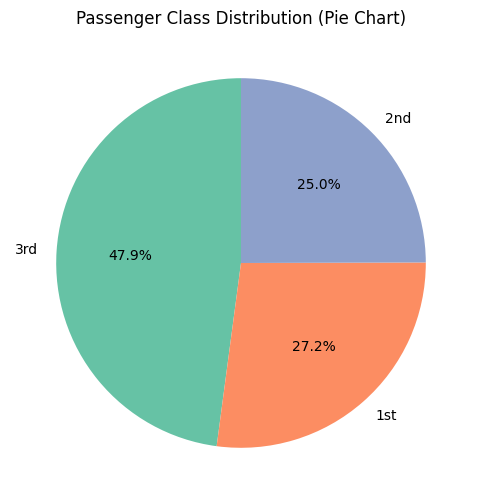

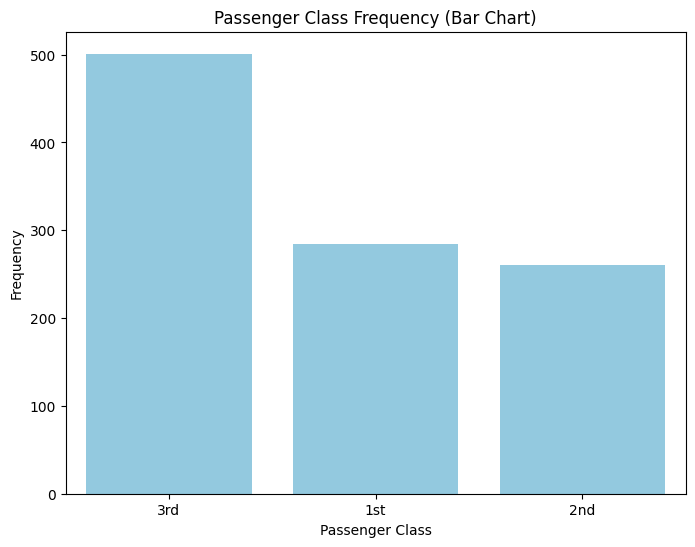

In [16]:
class_counts = titanic_cleaned['passengerClass'].value_counts()

# 1. Vẽ biểu đồ quạt cho biết tân số các nhóm của hạng hành khác (passengerClass) trong bộ dữ liệu Titanic
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Passenger Class Distribution (Pie Chart)')
plt.show()

# 2. Vẽ biểu đồ thanh cho biết tần số các nhóm của hạng hành khách
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, color="skyblue")
plt.title('Passenger Class Frequency (Bar Chart)')
plt.xlabel('Passenger Class')
plt.ylabel('Frequency')
plt.show()

### Câu 2 (1 điểm)

1. Vẽ biểu đồ thanh gom nhóm cho tần số sống chết (survived) chia theo hạng hành khách. 
1. Vẽ biểu đồ thanh xếp chồng cho tần số sống chết chia theo hạng hành khách.

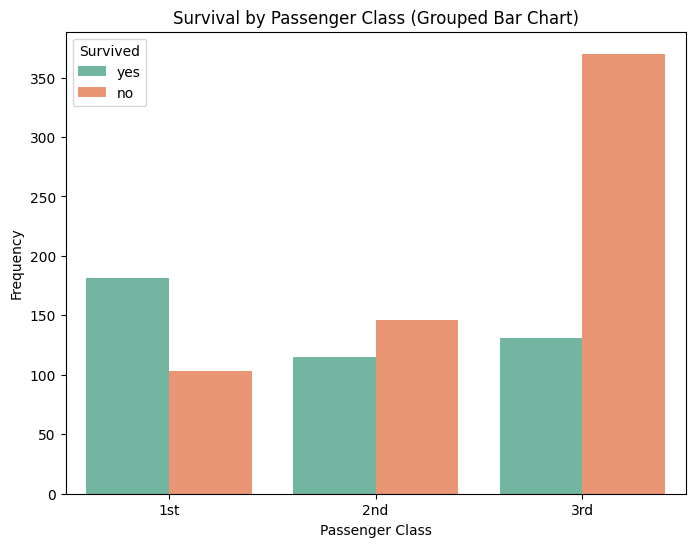

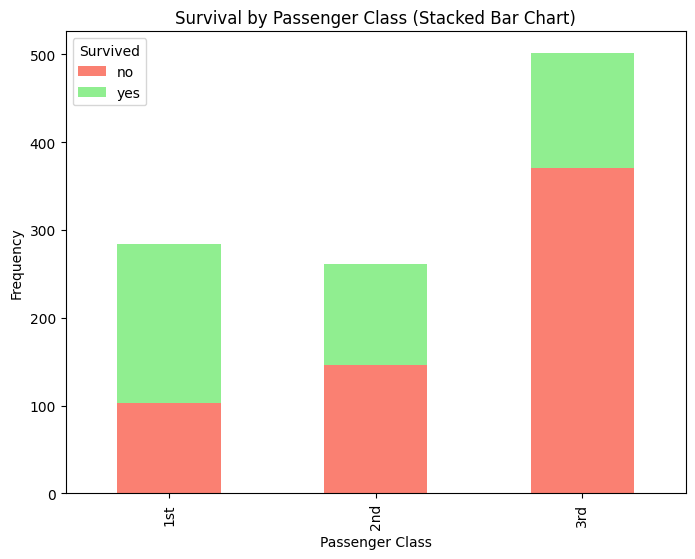

In [17]:
# 1. Vẽ biểu đồ thanh gom nhóm cho tần số sống chết (survived) chia theo hạng hành khách. 
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic_cleaned, x='passengerClass', hue='survived', palette='Set2')
plt.title('Survival by Passenger Class (Grouped Bar Chart)')
plt.xlabel('Passenger Class')
plt.ylabel('Frequency')
plt.legend(title='Survived')
plt.show()

# 2. Vẽ biểu đồ thanh xếp chồng cho tần số sống chết chia theo hạng hành khách.

# Chuẩn bị data cho biểu đồ xếp chồng
survival_counts = titanic_cleaned.groupby(['passengerClass', 'survived']).size().unstack()

# Vẽ biểu đồ
survival_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['salmon', 'lightgreen'])
plt.title('Survival by Passenger Class (Stacked Bar Chart)')
plt.xlabel('Passenger Class')
plt.ylabel('Frequency')
plt.legend(title='Survived')
plt.show()

### Câu 3 (1 điểm)

1. Vẽ histogram cho tuổi (age) với các khoảng chia đều.
1. Vẽ histogram cho tuổi với các khoảng chia không đều: 0 - 5 - 20 - 30 - 40 - 60 - 80.

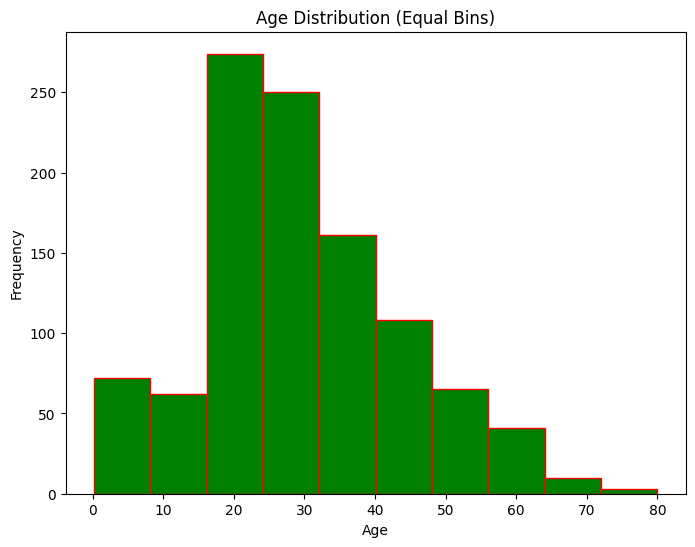

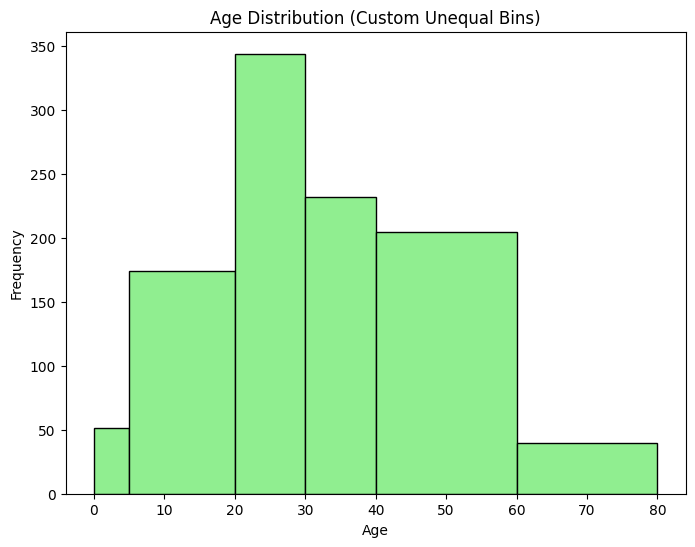

In [18]:
#1. Vẽ histogram cho tuổi (age) với các khoảng chia đều.
plt.figure(figsize=(8, 6))
plt.hist(titanic_cleaned['age'], bins=10, color='green', edgecolor='red')
plt.title('Age Distribution (Equal Bins)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#2. Vẽ histogram cho tuổi với các khoảng chia không đều: 0 - 5 - 20 - 30 - 40 - 60 - 80.
custom_bins = [0, 5, 20, 30, 40, 60, 80]
plt.figure(figsize=(8, 6))
plt.hist(titanic_cleaned['age'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.title('Age Distribution (Custom Unequal Bins)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Câu 4 (1 điểm)

1. Vẽ histogram kề cho tuổi theo nhóm sống chết.
1. Vẽ histogram xếp chồng cho tuổi theo nhóm sống chết.

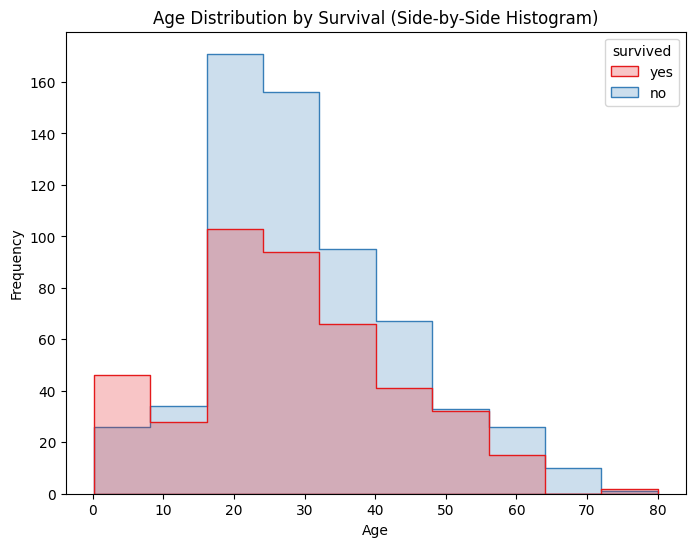

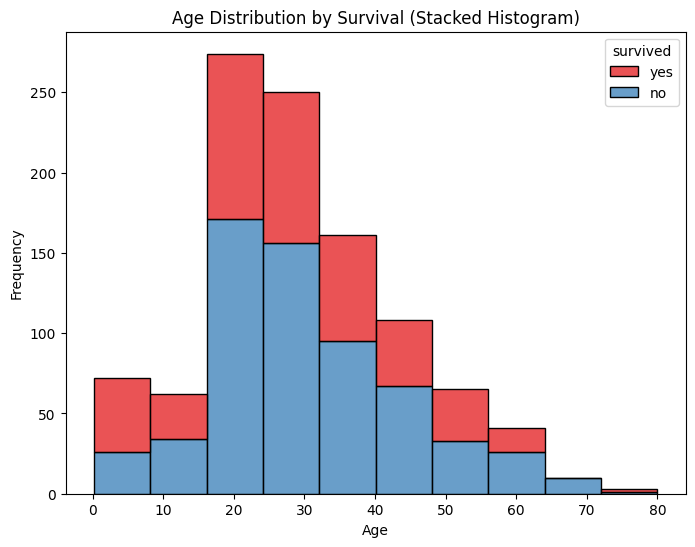

In [19]:
#1. Vẽ histogram kề cho tuổi theo nhóm sống chết.
plt.figure(figsize=(8, 6))
sns.histplot(titanic_cleaned, x='age', hue='survived', element='step', bins=10, palette='Set1')
plt.title('Age Distribution by Survival (Side-by-Side Histogram)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Vẽ histogram xếp chồng cho tuổi theo nhóm sống chết.
plt.figure(figsize=(8, 6))
sns.histplot(titanic_cleaned, x='age', hue='survived', multiple='stack', bins=10, palette='Set1')
plt.title('Age Distribution by Survival (Stacked Histogram)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Câu 5 (1 điểm)

1. Dùng histogram kiểm tra xem tuổi có ngoại lai hay không? 
1. Dùng boxplot kiểm tra xem tuổi có ngoại lai hay không?
1. Tính trung bình, trung vị của tuổi và so sánh.

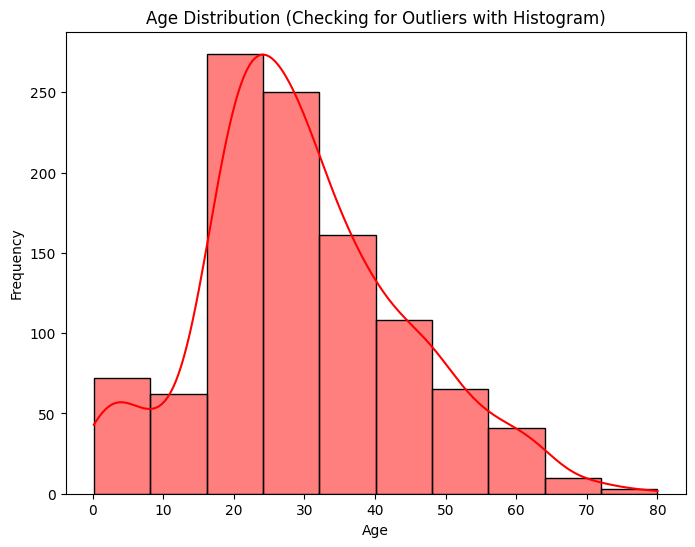

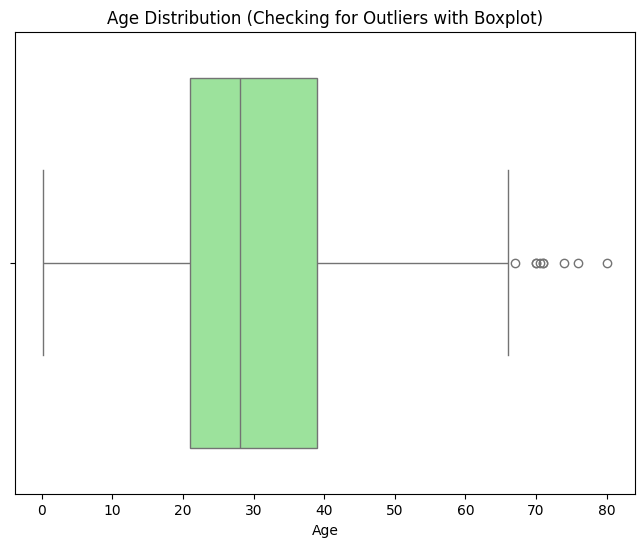

Trung bình của tuổi: 29.881134512434034
Trung vị của tuổi: 28.0


In [20]:
# 1.Vẽ histogram để kiểm tra ngoại lai
plt.figure(figsize=(8, 6))
sns.histplot(titanic_cleaned['age'], bins=10, kde=True, color='red')
plt.title('Age Distribution (Checking for Outliers with Histogram)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Dùng boxplot kiểm tra xem tuổi có ngoại lai hay không?
plt.figure(figsize=(8, 6))
sns.boxplot(x=titanic_cleaned['age'], color='lightgreen')
plt.title('Age Distribution (Checking for Outliers with Boxplot)')
plt.xlabel('Age')
plt.show()

# 3. Tính toán trung bình và trung vị
mean_age = titanic_cleaned['age'].mean()
median_age = titanic_cleaned['age'].median()

print(f"Trung bình của tuổi: {mean_age}")
print(f"Trung vị của tuổi: {median_age}")

Nhận xét:

1. Vẽ histogram để kiểm tra ngoại lai
- Phân bố: Biểu đồ histogram cho thấy phân bố của độ tuổi trong tập dữ liệu Titanic. Phân bố có vẻ gần giống hình chuông với một đỉnh tại độ tuổi 20-30.
- Giá trị ngoại lai: Trong histogram, không có thanh nào nằm tách biệt xa với các thanh còn lại. Điều này cho thấy rằng phần lớn hành khách có độ tuổi từ 0 đến khoảng 60. Tuy nhiên, có thể  thấy có một số giá trị nhỏ hơn (khoảng 5 tuổi) và giá trị lớn hơn (trên 70 tuổi) có thể gây nghi ngờ.
- KDE (Kernel Density Estimate): Đường đỏ (KDE) cho thấy mật độ xác suất của độ tuổi. Đường này cũng theo dõi khá sát các thanh histogram, cho thấy phân bố tuổi chủ yếu trong khoảng 20-30.
 -Từ biểu đồ histogram: Không có ngoại lai rõ ràng, nhưng một số giá trị lớn có thể cần kiểm tra thêm.

2. Boxplot
- Hộp (Box): Boxplot cho thấy khoảng giữa (interquartile range) từ phần trăm thứ 25 (Q1) đến phần trăm thứ 75 (Q3). Trong trường hợp này, hộp nằm trong khoảng từ khoảng 20 đến 38.
- Trung vị: Đường nằm trong hộp cho thấy trung vị nằm ở khoảng 28, gần với trung bình mà bạn đã tính toán.
- Giá trị ngoại lai: Các dấu chấm nằm ngoài whiskers (phần kéo dài của boxplot) là các giá trị ngoại lai. Trong biểu đồ này, bạn có thể thấy một số điểm nằm ở độ tuổi 70 trở lên. Điều này cho thấy rằng có một số hành khách lớn tuổi hơn có thể được xem là ngoại lai.
- Từ biểu đồ boxplot: Các điểm ngoại lai rõ ràng ở độ tuổi 70 trở lên. Điều này có thể ảnh hưởng đến phân tích trung bình.

3.
- Trung bình (Mean): Giá trị trung bình là 29.88, có thể bị ảnh hưởng bởi các giá trị ngoại lai lớn hơn trong tập dữ liệu. Trong trường hợp này, giá trị trung bình nằm gần 30 tuổi.
- Trung vị (Median): Giá trị trung vị là 28.0, cho biết rằng một nửa số hành khách có tuổi nhỏ hơn hoặc bằng 28 và một nửa còn lại lớn hơn hoặc bằng 28. Trung vị không bị ảnh hưởng bởi các giá trị ngoại lai và phản ánh tốt hơn độ tuổi của hầu hết hành khách.
- Ta có thể thấy rằng, khác biệt nhỏ: Ở đây, trung bình (29.88) cao hơn trung vị (28.0). Nguyên nhân có thể là do có thể có một số hành khách lớn tuổi hơn, kéo trung bình lên (có thể là các hành khách ở độ tuổi trên 60 hoặc 70). Sự khác biệt giữa trung bình và trung vị không quá lớn, nhưng vẫn cho thấy có sự hiện diện của một số giá trị lớn hơn trong tập dữ liệu.

### Câu 6 (1 điểm)

1. Tính các số đo tóm tắt hay dùng cho tuổi.
1. Tính các số đo tóm tắt hay dùng cho tuổi chia theo nhóm sống chết. 

In [21]:
# 1. Tính các số đo tóm tắt cho tuổi
summary_statistics_overall = titanic_cleaned['age'].describe()

# 2. Tính các số đo tóm tắt cho tuổi chia theo nhóm sống chết
summary_statistics_survived = titanic_cleaned.groupby('survived')['age'].describe()

summary_statistics_overall, summary_statistics_survived

(count    1046.000000
 mean       29.881135
 std        14.413500
 min         0.166700
 25%        21.000000
 50%        28.000000
 75%        39.000000
 max        80.000000
 Name: age, dtype: float64,
           count       mean        std     min   25%   50%   75%   max
 survived                                                             
 no        619.0  30.545369  13.922539  0.3333  21.0  28.0  39.0  74.0
 yes       427.0  28.918228  15.061481  0.1667  20.0  28.0  38.0  80.0)

## Bộ dữ liệu `GDP`

Tập tin `GDP.csv` chứa dữ liệu GDP của các nước Đông Á - Thái Bình Dương từ năm 1960 đến năm 2023 (nguồn World Bank: https://databank.worldbank.org/indicator/NY.GDP.PCAP.CD/1ff4a498/Popular-Indicators#).

### Câu 7 (1 điểm)

"Trích và mô tả" GDP của Việt Nam.

In [22]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [23]:
# Tải tệp CSV
file_path = 'GDP.csv'
gdp_data = pd.read_csv(file_path)

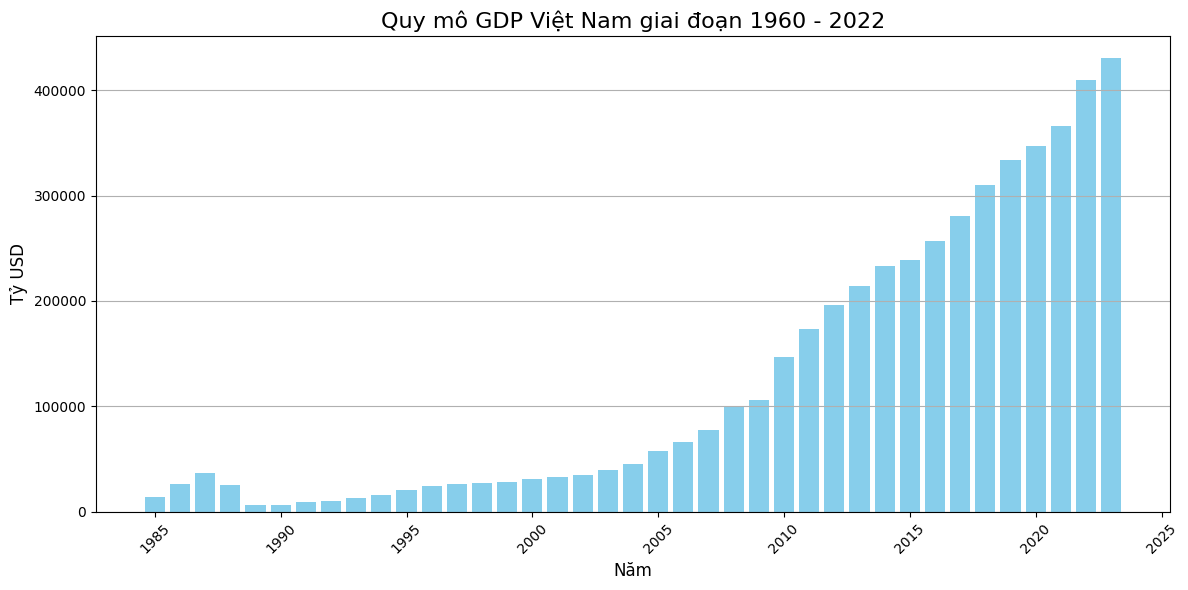

In [24]:
# Lọc dữ liệu cho Việt Nam
vietnam_gdp = gdp_data[gdp_data['Country Name'] == 'Viet Nam']

# Chuyển đổi dữ liệu để tập trung vào các năm và giá trị GDP, loại bỏ các cột không cần thiết
vietnam_gdp_clean = vietnam_gdp.drop(columns=['Series Name', 'Series Code', 'Country Name', 'Country Code']).transpose()

# Đặt lại chỉ số và đổi tên các cột để dễ đọc hơn
vietnam_gdp_clean.reset_index(inplace=True)
vietnam_gdp_clean.columns = ['Năm', 'GDP (USD hiện tại)']

# Trích xuất năm từ các chuỗi như '1960 [YR1960]' chỉ bằng cách giữ lại 4 ký tự đầu tiên
vietnam_gdp_clean['Năm'] = vietnam_gdp_clean['Năm'].str.extract(r'(\d{4})').astype(int)

# Thay thế '..' bằng NaN và chuyển đổi giá trị GDP sang kiểu float
vietnam_gdp_clean['GDP (USD hiện tại)'] = vietnam_gdp_clean['GDP (USD hiện tại)'].replace('..', None).astype(float)

# Xóa các hàng có giá trị NaN trong GDP
vietnam_gdp_clean.dropna(subset=['GDP (USD hiện tại)'], inplace=True)

# Chuyển đổi GDP từ triệu USD sang tỷ USD (nhân với 1.000)
vietnam_gdp_clean['GDP (USD hiện tại)'] *= 1_000

# Đảm bảo rằng các giá trị được định dạng đúng là số nguyên
vietnam_gdp_clean['GDP (USD hiện tại)'] = vietnam_gdp_clean['GDP (USD hiện tại)'].round(0).astype(int)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
plt.bar(vietnam_gdp_clean['Năm'], vietnam_gdp_clean['GDP (USD hiện tại)'], color='skyblue')
plt.title('Quy mô GDP Việt Nam giai đoạn 1960 - 2022', fontsize=16)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Tỷ USD', fontsize=12)

# Đặt trục y để sử dụng ScalarFormatter để vô hiệu hóa định dạng khoa học
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Đặt y-ticks để hiển thị theo tỷ
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000_000:.0f}'))  # Chuyển đổi sang tỷ

plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

Mô tả:

- GDP của Việt Nam đã trải qua sự tăng trưởng đáng kể từ năm 1960.
- Giai đoạn đầu (1960-1985) GDP tăng trưởng chậm, phản ánh tình hình kinh tế khó khăn và chiến tranh.
- Từ giữa những năm 1980, GDP bắt đầu tăng trưởng mạnh mẽ, nhờ vào các cải cách kinh tế và chính sách mở cửa.
- Tăng trưởng GDP càng rõ nét trong những năm 2000 và 2010, phản ánh sự phát triển kinh tế nhanh chóng và ổn định.
- Đến năm 2022, GDP Việt Nam đạt khoảng 400 tỷ USD, đánh dấu một cột mốc quan trọng trong sự phát triển kinh tế.
- Điều này cho thấy rằng việc tăng trưởng GDP của Việt Nam qua các năm cho thấy nỗ lực cải cách kinh tế, đầu tư phát triển và hội nhập quốc tế đã mang lại những kết quả tích cực, đưa Việt Nam trở thành một trong những nền kinh tế phát triển nhanh trong khu vực.
- Nguồn tham khảo:
    1. https://kinhtetrunguong.vn/kinh-te/kinh-tet-vi-mo/sau-36-nam-doi-moi-gdp-viet-nam-tang-gap-50-lan-lot-top-5-nuoc-co-quy-mo-kinh-te-tang-nhieu-nhat-the-gioi..html
    2. https://www.mof.gov.vn/webcenter/portal/vclvcstc/pages_r/l/chi-tiet-tin?dDocName=MOFUCM089269
    3. https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

### Câu 8 (1 điểm)

"So sánh" GDP của Việt Nam với Thái Lan.

In [25]:
import matplotlib.ticker as ticker

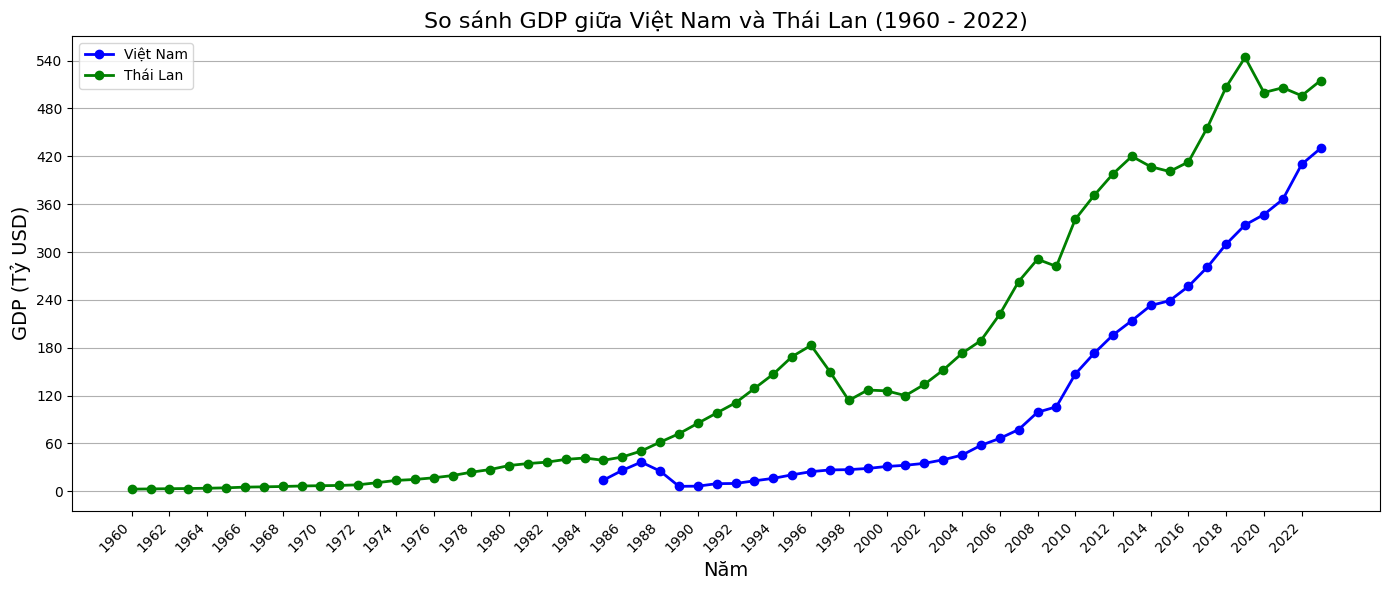

In [26]:
# Lọc dữ liệu cho Việt Nam và Thái Lan
vietnam_gdp = gdp_data[gdp_data['Country Name'] == 'Viet Nam']
thailand_gdp = gdp_data[gdp_data['Country Name'] == 'Thailand']

# Làm sạch dữ liệu GDP của Việt Nam
vietnam_gdp_clean = vietnam_gdp.drop(columns=['Series Name', 'Series Code', 'Country Name', 'Country Code']).transpose()
vietnam_gdp_clean.reset_index(inplace=True)
vietnam_gdp_clean.columns = ['Năm', 'GDP (Việt Nam, USD hiện tại)']
vietnam_gdp_clean['Năm'] = vietnam_gdp_clean['Năm'].str.split(' ').str[0].astype(int)

# Thay thế các giá trị không phải số bằng NaN và chuyển đổi sang float
vietnam_gdp_clean['GDP (Việt Nam, USD hiện tại)'] = pd.to_numeric(vietnam_gdp_clean['GDP (Việt Nam, USD hiện tại)'], errors='coerce')

# Làm sạch dữ liệu GDP của Thái Lan
thailand_gdp_clean = thailand_gdp.drop(columns=['Series Name', 'Series Code', 'Country Name', 'Country Code']).transpose()
thailand_gdp_clean.reset_index(inplace=True)
thailand_gdp_clean.columns = ['Năm', 'GDP (Thái Lan, USD hiện tại)']
thailand_gdp_clean['Năm'] = thailand_gdp_clean['Năm'].str.split(' ').str[0].astype(int)

# Thay thế các giá trị không phải số bằng NaN và chuyển đổi sang float
thailand_gdp_clean['GDP (Thái Lan, USD hiện tại)'] = pd.to_numeric(thailand_gdp_clean['GDP (Thái Lan, USD hiện tại)'], errors='coerce')

# Kết hợp dữ liệu GDP của Việt Nam và Thái Lan
comparison_gdp = pd.merge(vietnam_gdp_clean, thailand_gdp_clean, on='Năm')

# Vẽ biểu đồ
plt.figure(figsize=(14, 6))  # Tăng kích thước hình cho khoảng cách tốt hơn
plt.plot(comparison_gdp['Năm'], comparison_gdp['GDP (Việt Nam, USD hiện tại)'], marker='o', label='Việt Nam', color='blue', linewidth=2)
plt.plot(comparison_gdp['Năm'], comparison_gdp['GDP (Thái Lan, USD hiện tại)'], marker='o', label='Thái Lan', color='green', linewidth=2)

plt.title('So sánh GDP giữa Việt Nam và Thái Lan (1960 - 2022)', fontsize=16)
plt.xlabel('Năm', fontsize=14)
plt.ylabel('GDP (Tỷ USD)', fontsize=14)

# Đặt định dạng tick trục y thành tỷ và thêm đường lưới
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x/1e9)}'))  # Định dạng tick thành tỷ
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Đảm bảo tick là số nguyên
plt.grid(axis='y')

# Điều chỉnh x-ticks để tăng khoảng cách
plt.xticks(comparison_gdp['Năm'], rotation=45, ha='right')  # Căn chỉnh ngang về bên phải
plt.xticks(ticks=comparison_gdp['Năm'][::2], labels=comparison_gdp['Năm'][::2])  # Hiển thị mỗi năm thứ hai để rõ ràng hơn

plt.legend()
plt.tight_layout()
plt.show()


### Câu 9 (2 điểm)

Tạo "video trình diễn xếp hạng" GDP các nước Đông Nam Á theo thời gian. (Tương tự như: https://www.youtube.com/watch?v=hbKNukxIFRA)

In [ ]:
pip install moviepy

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from moviepy.editor import ImageSequenceClip

# Tải dữ liệu GDP
gdp_data = pd.read_csv('GDP.csv')

# Định nghĩa mã quốc gia và tên tương ứng cho các nước Đông Nam Á
country_mapping = {
    "BRN": "Brunei Darussalam",
    "KHM": "Campuchia",
    "IDN": "Indonesia",
    "LAO": "Cộng hòa Dân chủ Nhân dân Lào",
    "MYS": "Malaysia",
    "MMR": "Myanmar",
    "PHL": "Philippines",
    "SGP": "Singapore",
    "THA": "Thái Lan",
    "VNM": "Việt Nam"
}

southeast_asia_country_codes = list(country_mapping.keys())

# Lọc dữ liệu GDP cho các nước Đông Nam Á
sea_gdp = gdp_data[gdp_data['Country Code'].isin(southeast_asia_country_codes)]

# Xử lý dữ liệu cho từng quốc gia
sea_gdp_clean = {}

for country_code in southeast_asia_country_codes:
    # Lọc dữ liệu cho từng quốc gia
    country_gdp = sea_gdp[sea_gdp['Country Code'] == country_code]
    
    # Xóa các cột không cần thiết và chuyển đổi
    country_gdp_clean = country_gdp.drop(columns=['Series Name', 'Series Code', 'Country Name', 'Country Code']).transpose()
    country_gdp_clean.reset_index(inplace=True)
    
    # Đổi tên cột
    country_gdp_clean.columns = ['Năm', f'GDP ({country_code}, USD hiện tại)']
    
    # Chuyển đổi năm thành số và GDP thành số thực, thay thế giá trị NaN và None
    country_gdp_clean['Năm'] = country_gdp_clean['Năm'].str.split(' ').str[0].astype(int)
    country_gdp_clean[f'GDP ({country_code}, USD hiện tại)'] = pd.to_numeric(
        country_gdp_clean[f'GDP ({country_code}, USD hiện tại)'], errors='coerce'
    ).fillna(0)

    # Đảm bảo tất cả giá trị GDP là số thực
    assert country_gdp_clean[f'GDP ({country_code}, USD hiện tại)'].dtype in ['float64', 'int64']
    
    # Lưu vào từ điển
    sea_gdp_clean[country_code] = country_gdp_clean

# Kết hợp dữ liệu cho tất cả các nước dựa trên 'Năm'
final_gdp_data = pd.concat([sea_gdp_clean[country]['Năm'].to_frame().merge(
    sea_gdp_clean[country], on='Năm') for country in southeast_asia_country_codes], axis=1)

# Loại bỏ các cột 'Năm' trùng lặp sau khi kết hợp
final_gdp_data = final_gdp_data.loc[:,~final_gdp_data.columns.duplicated()]

# Lấy dữ liệu GDP của năm gần nhất để sắp xếp
latest_year = final_gdp_data['Năm'].max()

# Tạo danh sách để lưu giá trị GDP để sắp xếp
latest_gdp = []

for country_code in southeast_asia_country_codes:
    # Lấy giá trị GDP gần nhất cho từng quốc gia
    latest_value = final_gdp_data.loc[final_gdp_data['Năm'] == latest_year, f'GDP ({country_code}, USD hiện tại)'].values[0]
    latest_gdp.append((country_code, latest_value))

# Sắp xếp danh sách theo GDP giảm dần
sorted_countries = sorted(latest_gdp, key=lambda x: x[1], reverse=True)

# Vẽ biểu đồ và lưu hình ảnh theo thứ tự sắp xếp với thứ hạng trong tiêu đề
image_files = []

for rank, (country_code, _) in enumerate(sorted_countries, start=1):
    country_name = country_mapping[country_code]  # Lấy tên quốc gia
    
    # Tăng kích thước hình ảnh (figsize=(rộng, cao)) để làm cho các tiêu đề hiển thị rõ ràng hơn
    plt.figure(figsize=(12, 8))  # Kích thước lớn hơn cho hình ảnh
    
    plt.plot(final_gdp_data['Năm'], final_gdp_data[f'GDP ({country_code}, USD hiện tại)'], label=f'GDP ({country_name})')
    
    # Thêm thứ hạng và tên quốc gia vào tiêu đề
    plt.title(f'Hạng {rank}: GDP của {country_name} qua các năm', fontsize=16)
    plt.xlabel('Năm', fontsize=14)
    plt.ylabel('GDP (triệu USD hiện tại)', fontsize=14)
    plt.legend()

    # Đặt trục y sử dụng ScalarFormatter để không dùng ký hiệu khoa học
    plt.gca().yaxis.set_major_formatter(ScalarFormatter())

    # Đặt y-ticks hiển thị bằng triệu USD
    plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x/1_000_000:.0f}'))  # Chuyển đổi sang triệu
    
    # Lưu hình ảnh vào file
    image_file = f"{rank}_{country_code}_gdp.png"
    plt.savefig(image_file)
    plt.close()
    image_files.append(image_file)

# Tạo video từ các hình ảnh
if image_files:
    clip = ImageSequenceClip(image_files, fps=1)  # 1 khung hình mỗi giây
    clip.write_videofile('sea_gdp_video.mp4', codec='libxvid')  # Thay đổi codec nếu cần
    print("Video đã được tạo thành công với tiêu đề thứ hạng!")
else:
    print("Không có hình ảnh để tạo video.")


Moviepy - Building video sea_gdp_video.mp4.
Moviepy - Writing video sea_gdp_video.mp4



Moviepy - Done !
Moviepy - video ready sea_gdp_video.mp4
Video đã được tạo thành công với tiêu đề thứ hạng!
